## Mortgage Loans: Logistic Regression Example

In [74]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import pickle

In [2]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-1.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.4 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)


In [4]:
df = pd.read_csv('../data/loan_data_set.csv')
df.shape

(614, 13)

In [5]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan = df

In [25]:
loan.drop(['Loan_ID'], axis=1, inplace=True)

/tmp/ipykernel_148/2434148800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.drop(['Loan_ID'], axis=1, inplace=True)


In [26]:
loan.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [27]:
loan['Education'].replace(['Graduate', 'Not Graduate'],
                        [1, 0], inplace=True)

/tmp/ipykernel_148/3473061090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['Education'].replace(['Graduate', 'Not Graduate'],


In [28]:
loan['Loan_Status'].replace(['Y', 'N'],
                        [1, 0], inplace=True)

/tmp/ipykernel_148/4214267916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['Loan_Status'].replace(['Y', 'N'],


In [29]:
loan.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [41]:
loan.Dependents.unique()

array(['1', '0', '2', '3+'], dtype=object)

In [30]:
loan.Married.unique()

array(['Yes', 'No'], dtype=object)

In [31]:
loan.Education.unique()

array([1, 0])

In [32]:
loan=loan.dropna()

In [33]:
loan.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [34]:
loan.Property_Area.unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [39]:
dummies=pd.get_dummies(loan, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [49]:
dummies.head(5)

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,0,1,0,0,1,0,1,0,0
2,1,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,1,0,0,0,1,0,0,0,1
4,1,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,0,0,1,0,0,0,1
5,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1,0,0,1,0,0,1,0,0,1


In [50]:
loan=dummies

In [40]:
merged = pd.concat([loan, dummies], axis='columns')

In [135]:
loan.head(5)

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Married_No,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Approval
1,1,4583,1508.0,128.0,360.0,1.0,0,0,0,0,1,0,0,1,1,0,0,0
2,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,0,0,0,0,0,0,1,0
3,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,0,0,0,1,0,0,1,0
4,1,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,0,1,0,0,1,0
5,1,5417,4196.0,267.0,360.0,1.0,1,0,0,0,0,1,0,0,0,0,1,0


In [42]:
merged.drop(['Gender', 'Married','Self_Employed','Property_Area','Dependents','Loan_Approval'], axis='columns')

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education,ApplicantIncome,CoapplicantIncome,...,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,4583,1508.0,128.0,360.0,1.0,0,1,4583,1508.0,...,1,0,1,0,0,1,0,1,0,0
2,1,3000,0.0,66.0,360.0,1.0,1,1,3000,0.0,...,1,1,0,0,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,0,2583,2358.0,...,1,1,0,0,0,1,0,0,0,1
4,1,6000,0.0,141.0,360.0,1.0,1,1,6000,0.0,...,0,1,0,0,0,1,0,0,0,1
5,1,5417,4196.0,267.0,360.0,1.0,1,1,5417,4196.0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,2900,0.0,71.0,360.0,1.0,1,1,2900,0.0,...,0,1,0,0,0,1,0,1,0,0
610,1,4106,0.0,40.0,180.0,1.0,1,1,4106,0.0,...,1,0,0,0,1,1,0,1,0,0
611,1,8072,240.0,253.0,360.0,1.0,1,1,8072,240.0,...,1,0,1,0,0,1,0,0,0,1
612,1,7583,0.0,187.0,360.0,1.0,1,1,7583,0.0,...,1,0,0,1,0,1,0,0,0,1


In [51]:
# Create correlation matrix
corr_matrix = loan.corr().abs()
corr_matrix

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Education,1.000000,0.131172,0.074499,0.172780,0.102168,0.056656,0.068437,0.059245,0.059245,0.001652,0.001652,0.014369,0.016242,0.011184,0.031827,0.005085,0.005085,0.067607,0.038137,0.025884
ApplicantIncome,0.131172,1.000000,0.112588,0.495310,0.010838,0.056152,0.043152,0.032644,0.032644,0.036717,0.036717,0.121405,0.071367,0.017426,0.143633,0.170785,0.170785,0.045154,0.000551,0.044767
CoapplicantIncome,0.074499,0.112588,1.000000,0.190740,0.005775,0.008692,0.049020,0.156171,0.156171,0.102950,0.102950,0.000991,0.016015,0.028266,0.019006,0.001509,0.001509,0.001101,0.008322,0.009866
LoanAmount,0.172780,0.495310,0.190740,1.000000,0.050867,0.040773,0.071753,0.098975,0.098975,0.183442,0.183442,0.178494,0.087870,0.061174,0.115373,0.120389,0.120389,0.086569,0.013365,0.098826
Loan_Amount_Term,0.102168,0.010838,0.005775,0.050867,1.000000,0.032937,0.007798,0.088704,0.088704,0.107504,0.107504,0.118518,0.101258,0.005885,0.066826,0.034852,0.034852,0.033777,0.030346,0.065097
Credit_History,0.056656,0.056152,0.008692,0.040773,0.032937,1.000000,0.529390,0.022447,0.022447,0.029095,0.029095,0.011429,0.005280,0.037047,0.063797,0.023568,0.023568,0.022504,0.046480,0.027062
Loan_Status,0.068437,0.043152,0.049020,0.071753,0.007798,0.529390,1.000000,0.064504,0.064504,0.112321,0.112321,0.022938,0.040350,0.073368,0.005784,0.034715,0.034715,0.110817,0.155686,0.055964
Gender_Female,0.059245,0.032644,0.156171,0.098975,0.088704,0.022447,0.064504,1.000000,1.000000,0.349424,0.349424,0.185582,0.009718,0.159802,0.123341,0.002761,0.002761,0.058739,0.108538,0.057137
Gender_Male,0.059245,0.032644,0.156171,0.098975,0.088704,0.022447,0.064504,1.000000,1.000000,0.349424,0.349424,0.185582,0.009718,0.159802,0.123341,0.002761,0.002761,0.058739,0.108538,0.057137
Married_No,0.001652,0.036717,0.102950,0.183442,0.107504,0.029095,0.112321,0.349424,0.349424,1.000000,1.000000,0.410047,0.154106,0.261974,0.162856,0.015674,0.015674,0.039048,0.011121,0.026467


In [52]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

/tmp/ipykernel_148/2797590206.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Education,NaN,0.131172,0.074499,0.17278,0.102168,0.056656,0.068437,0.059245,0.059245,0.001652,0.001652,0.014369,0.016242,0.011184,0.031827,0.005085,0.005085,0.067607,0.038137,0.025884
ApplicantIncome,NaN,NaN,0.112588,0.49531,0.010838,0.056152,0.043152,0.032644,0.032644,0.036717,0.036717,0.121405,0.071367,0.017426,0.143633,0.170785,0.170785,0.045154,0.000551,0.044767
CoapplicantIncome,NaN,NaN,NaN,0.19074,0.005775,0.008692,0.049020,0.156171,0.156171,0.102950,0.102950,0.000991,0.016015,0.028266,0.019006,0.001509,0.001509,0.001101,0.008322,0.009866
LoanAmount,NaN,NaN,NaN,NaN,0.050867,0.040773,0.071753,0.098975,0.098975,0.183442,0.183442,0.178494,0.087870,0.061174,0.115373,0.120389,0.120389,0.086569,0.013365,0.098826
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN,0.032937,0.007798,0.088704,0.088704,0.107504,0.107504,0.118518,0.101258,0.005885,0.066826,0.034852,0.034852,0.033777,0.030346,0.065097
Credit_History,NaN,NaN,NaN,NaN,NaN,NaN,0.529390,0.022447,0.022447,0.029095,0.029095,0.011429,0.005280,0.037047,0.063797,0.023568,0.023568,0.022504,0.046480,0.027062
Loan_Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064504,0.064504,0.112321,0.112321,0.022938,0.040350,0.073368,0.005784,0.034715,0.034715,0.110817,0.155686,0.055964
Gender_Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.349424,0.349424,0.185582,0.009718,0.159802,0.123341,0.002761,0.002761,0.058739,0.108538,0.057137
Gender_Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.349424,0.349424,0.185582,0.009718,0.159802,0.123341,0.002761,0.002761,0.058739,0.108538,0.057137
Married_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.410047,0.154106,0.261974,0.162856,0.015674,0.015674,0.039048,0.011121,0.026467


In [53]:
# Find index of feature columns with correlation greater than 0.50
to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]
to_drop

['Gender_Male', 'Married_Yes', 'Self_Employed_Yes']

In [138]:
#loan=loan.drop(['Gender_Male', 'Married_Yes','Self_Employed_Yes','Loan_Approval'], axis='columns')

In [137]:
loan=loan.drop(['Loan_Approval'], axis='columns')

<AxesSubplot:>

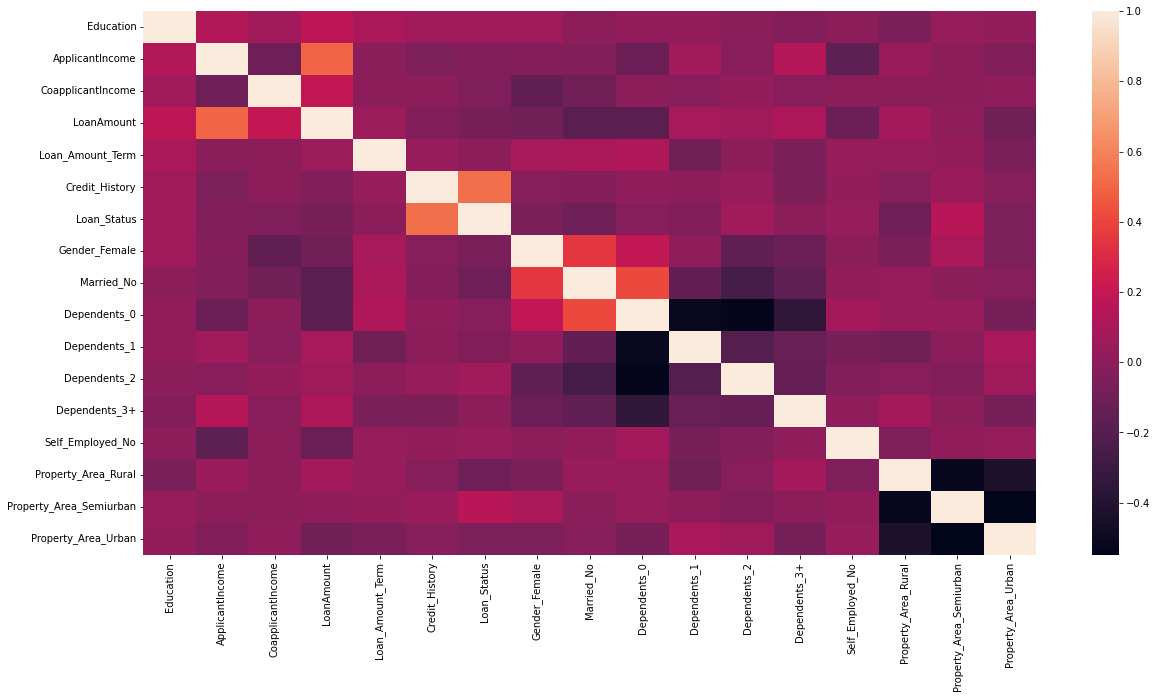

In [58]:
#### 4.2 Correlation heatmap of the numberic variables
import seaborn as sns
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(loan.corr())

<AxesSubplot:>

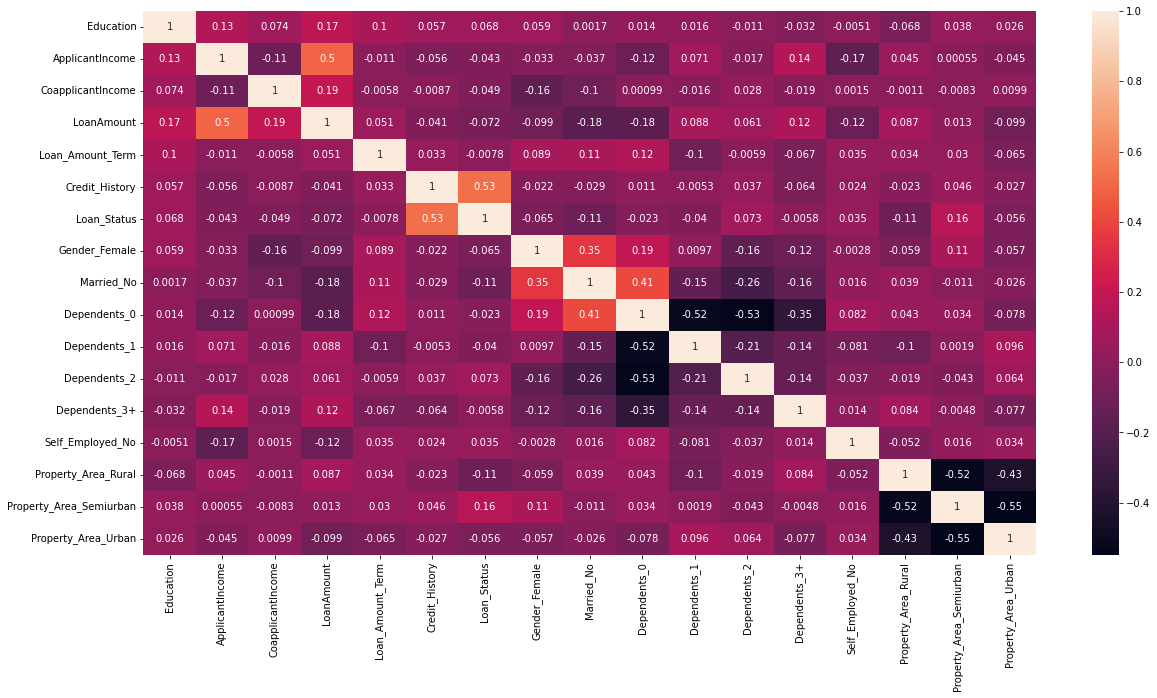

In [59]:
plt.figure(figsize=(20,10)) 
sns.heatmap(loan.corr(), annot=True) 


<AxesSubplot:>

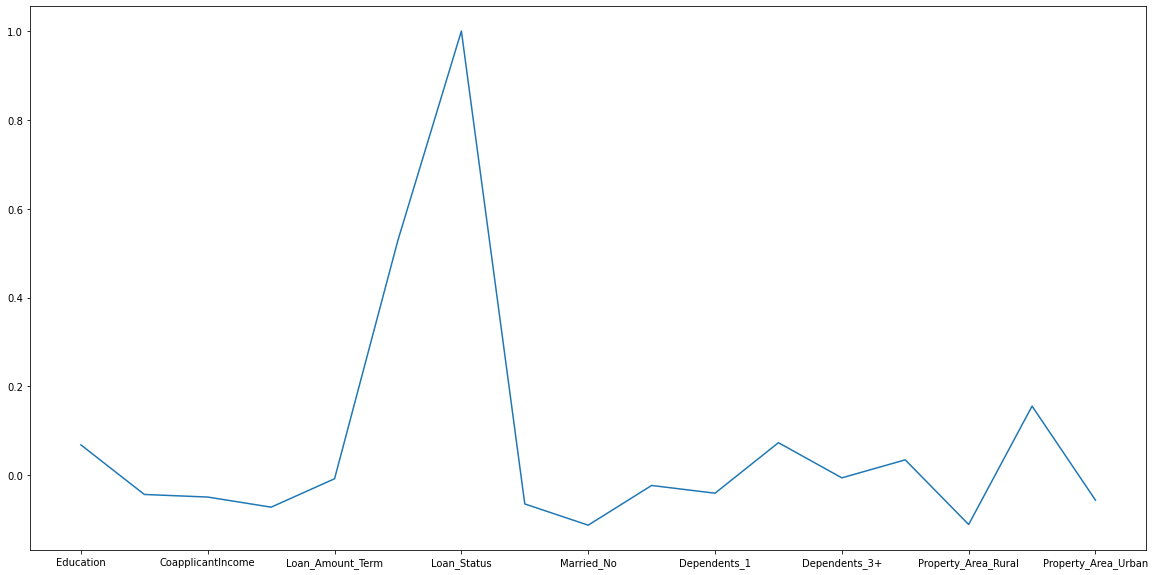

In [63]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
loan.corr()['Loan_Status'].plot()

In [123]:
corr_matrix = loan.corr()
c = corr_matrix.abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

#first element of sol series is the pair with the biggest correlation
sol

/tmp/ipykernel_148/1155980165.py:6: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Credit_History           Loan_Status                0.529390
ApplicantIncome          LoanAmount                 0.495310
Married_No               Dependents_0               0.410047
Gender_Female            Married_No                 0.349424
CoapplicantIncome        LoanAmount                 0.190740
                                                      ...   
Property_Area_Rural      Property_Area_Urban       -0.430446
Dependents_0             Dependents_1              -0.515771
Property_Area_Rural      Property_Area_Semiurban   -0.519037
Dependents_0             Dependents_2              -0.534999
Property_Area_Semiurban  Property_Area_Urban       -0.548096
Length: 136, dtype: float64

<AxesSubplot:>

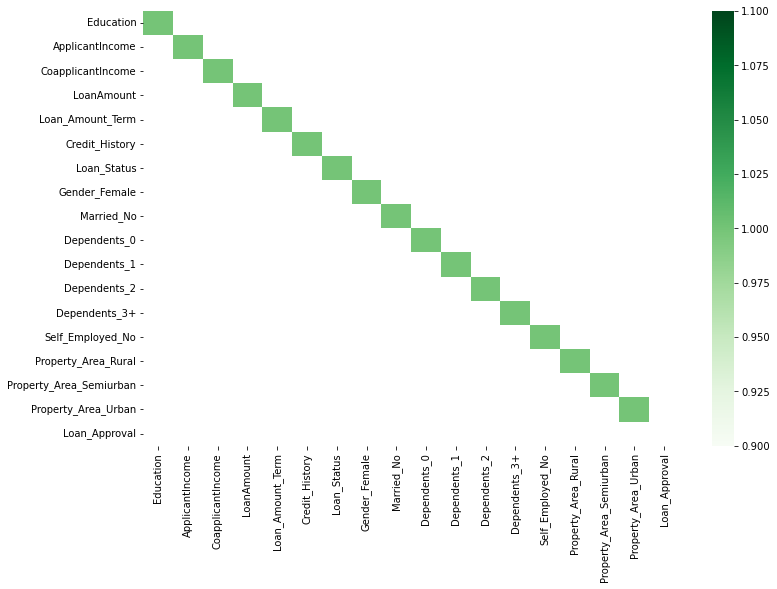

In [124]:
corr = corr_matrix.abs()

kot = corr[corr>=.6]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [126]:
# Create correlation matrix
corr_matrix = loan.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop
#Not dropping any columns as the correlation is not greater than 0.6 for any of the input features. 

/tmp/ipykernel_148/3315850850.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[]

In [159]:
loan[loan.columns[0:]].corr()['Loan_Status'][:].sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

Loan_Status                1.000000
Credit_History             0.529390
Property_Area_Semiurban    0.155686
Dependents_2               0.073368
Education                  0.068437
Self_Employed_No           0.034715
Dependents_3+             -0.005784
Loan_Amount_Term          -0.007798
Dependents_0              -0.022938
Dependents_1              -0.040350
ApplicantIncome           -0.043152
CoapplicantIncome         -0.049020
Property_Area_Urban       -0.055964
Gender_Female             -0.064504
LoanAmount                -0.071753
Property_Area_Rural       -0.110817
Married_No                -0.112321
Name: Loan_Status, dtype: float64

In [156]:
# Splitting the dataset into the Training set and Test set
X = loan.drop('Loan_Status', axis = 1)
y = loan.Loan_Status


from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .3,
                                               random_state= 21)

[0.03423117 0.03719117 0.04457668 0.04048068 0.04766195 0.37857443
 0.03528074 0.04496139 0.04728074 0.06720049 0.03780914 0.04332129
 0.01998064 0.04183017 0.04818377 0.03143552]


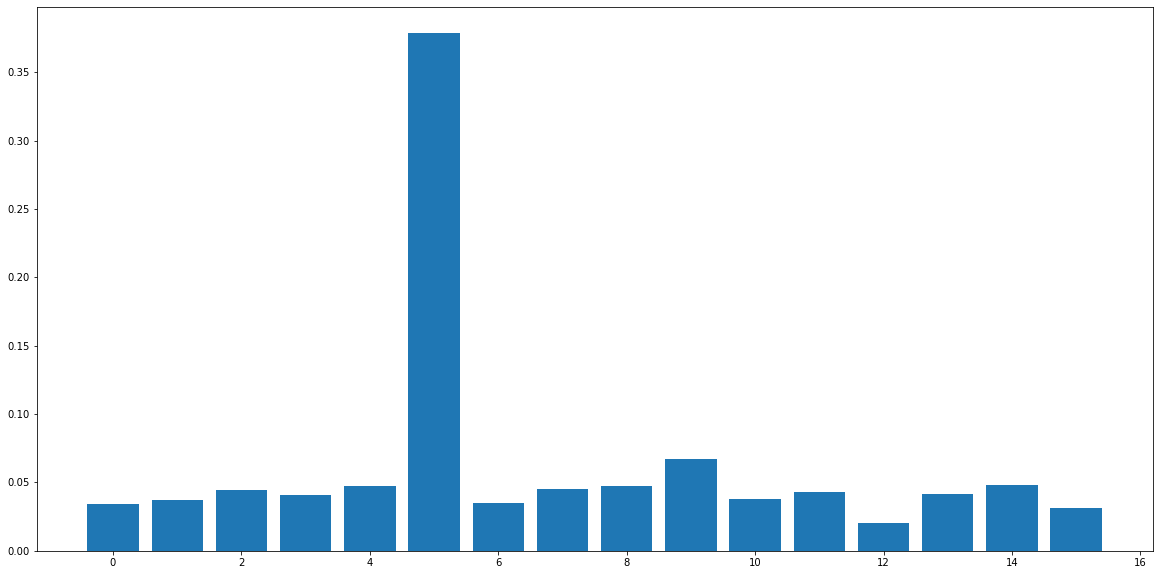

In [157]:
from xgboost import XGBClassifier
from matplotlib import pyplot

plt.figure(figsize=(20,10))

# fit model no training data
model = XGBClassifier()
model.fit(training_features, training_target)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [158]:
feature_importances = pd.DataFrame({'Importance Coef' :model.feature_importances_ , 'Features' : training_features.columns})
feature_importances.nlargest(19, 'Importance Coef')

,Importance Coef,Features
5,0.378574,Credit_History
9,0.067200,Dependents_1
14,0.048184,Property_Area_Semiurban
4,0.047662,Loan_Amount_Term
8,0.047281,Dependents_0
7,0.044961,Married_No
2,0.044577,CoapplicantIncome
11,0.043321,Dependents_3+
13,0.041830,Property_Area_Rural
3,0.040481,LoanAmount


In [451]:
loan.Loan_Status.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [76]:
loan.Education.value_counts()

1    383
0     97
Name: Education, dtype: int64

In [134]:
loan.columns

Index(['Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Married_No', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Self_Employed_No', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Approval'],
      dtype='object')

In [95]:
loan = loan.astype({"Education":"int"})

## Exploratory Data Analysis

In [176]:
# declare the list of features
features = ['Credit_History','Dependents_1','Property_Area_Semiurban','Loan_Amount_Term','Married_No','CoapplicantIncome','LoanAmount','Gender_Female']
df=loan

In [177]:
# recode missing values
print(df[features].isnull().sum())
for feature in ['LoanAmount','Loan_Amount_Term','ApplicantIncome']:
    df[feature].fillna(value=df[feature].mean(), inplace=True)
print(df[features].isnull().sum())

Credit_History             0
Dependents_1               0
Property_Area_Semiurban    0
Loan_Amount_Term           0
Married_No                 0
CoapplicantIncome          0
LoanAmount                 0
Gender_Female              0
dtype: int64
Credit_History             0
Dependents_1               0
Property_Area_Semiurban    0
Loan_Amount_Term           0
Married_No                 0
CoapplicantIncome          0
LoanAmount                 0
Gender_Female              0
dtype: int64


In [178]:
for feature in ['LoanAmount','Loan_Amount_Term','ApplicantIncome']:
    print(df[feature].agg(['mean', 'median', 'min', 'max']))

mean      144.735417
median    128.000000
min         9.000000
max       600.000000
Name: LoanAmount, dtype: float64
mean      342.05
median    360.00
min        36.00
max       480.00
Name: Loan_Amount_Term, dtype: float64
mean       5364.23125
median     3859.00000
min         150.00000
max       81000.00000
Name: ApplicantIncome, dtype: float64


In [179]:
# credit: missing data
print(df.shape)
print(df['Credit_History'].value_counts(dropna=False))
df.dropna(subset=['Credit_History'], inplace=True)
print(df.shape)

(480, 17)
1.0    410
0.0     70
Name: Credit_History, dtype: int64
(480, 17)


In [85]:
# recode the target variable as numeric
df['Loan_Approval']=np.where(df['Loan_Status']=="Y", 1, 0)
df['Loan_Approval'].value_counts(dropna=False)

0    480
Name: Loan_Approval, dtype: int64

## Model Building

In [272]:
loan.head(5)

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Married_No,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,4583,1508.0,128.0,360.0,1.0,0,0,0,0,1,0,0,1,1,0,0
2,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,0,0,0,0,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,0,0,0,1,0,0,1
4,1,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,0,1,0,0,1
5,1,5417,4196.0,267.0,360.0,1.0,1,0,0,0,0,1,0,0,0,0,1


In [454]:
count_class_0, count_class_1 = loan.Loan_Status.value_counts()
# Divide by class
df_class_0 = loan[loan['Loan_Status'] == 0]
df_class_1 = loan[loan['Loan_Status'] == 1]

In [456]:
print('Random over-sampling:')
loan_0_over = df_class_0.sample(count_class_0,random_state=21, replace=True)
loan_0_over = pd.concat([df_class_1, loan_0_over], axis=0)

Random over-sampling:


In [455]:
print(count_class_0)
print(count_class_1)

332
148


In [457]:
loan_0_over.columns

Index(['Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Married_No', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Self_Employed_No', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [458]:
loan_0_over.head(5)

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Married_No,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
2,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,0,0,0,0,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,0,0,0,1,0,0,1
4,1,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,0,1,0,0,1
5,1,5417,4196.0,267.0,360.0,1.0,1,0,0,0,0,1,0,0,0,0,1
6,0,2333,1516.0,95.0,360.0,1.0,1,0,0,1,0,0,0,1,0,0,1


In [459]:
loan_0_over.dtypes

Education                    int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Gender_Female                uint8
Married_No                   uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Self_Employed_No             uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [460]:
loan_0_over.columns

Index(['Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Married_No', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Self_Employed_No', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [461]:
loan=loan_0_over

In [476]:
loan[loan.columns[0:]].corr()['Loan_Status'][:].sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

Loan_Status                1.000000
Credit_History             0.514136
Property_Area_Semiurban    0.165419
Dependents_2               0.068129
Education                  0.062931
Self_Employed_No           0.026155
Dependents_0              -0.009120
Loan_Amount_Term          -0.019486
Dependents_1              -0.028254
Property_Area_Urban       -0.035764
Dependents_3+             -0.035974
Gender_Female             -0.046967
CoapplicantIncome         -0.050133
ApplicantIncome           -0.064059
LoanAmount                -0.070445
Married_No                -0.087936
Property_Area_Rural       -0.135679
Name: Loan_Status, dtype: float64

In [477]:
# declare the list of features
features = ['Credit_History', 'Property_Area_Semiurban', 'Dependents_2', 'Education',
       'Self_Employed_No', 'Property_Area_Rural', 'Married_No',
       'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Gender_Female']
df=loan

In [540]:
# declare the list of features
features = ['Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female',
       'Married_No', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Self_Employed_No', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']
df=loan

In [541]:
# specify X and y
y = loan['Loan_Status']
X = loan[features]

In [542]:
y.value_counts()

1    332
0    332
Name: Loan_Status, dtype: int64

In [543]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=12)

In [544]:
# Fit the model to the training dataset
mymodel = LogisticRegression()
mymodel.fit(X_train, y_train)

LogisticRegression()

In [545]:
# coefficients and intercept
mymodel.intercept_
mymodel.coef_

array([[ 4.19834331e-01, -2.43809153e-05, -1.00476196e-04,
        -1.56108998e-03, -5.59319254e-03,  2.61572901e+00,
        -6.75469801e-02, -4.76702597e-01,  9.08379430e-02,
        -1.75760033e-01,  3.28919262e-01, -1.23811623e-01,
         1.21364703e-01, -4.92689959e-01,  6.62144466e-01,
        -4.92689587e-02]])

In [546]:
# Predict the y-values on the testing dataset
y_preds = mymodel.predict(X_test)
y_probs = mymodel.predict_proba(X_test)
y_pred_proba = mymodel.predict_proba(X_test)[::,1]

In [523]:
import sklearn
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()


In [528]:
X_train_scaled = std_scaler.transform(X_train.values)
X_train_scaled[0]

array([ 0.51075392,  4.7220677 , -0.7128282 ,  1.5179389 ,  0.27367996,
        0.53748385, -0.45643546, -0.73588602, -1.10457942,  2.15836433,
       -0.45987852, -0.3317346 ,  0.40722125, -0.67082039,  1.28507921,
       -0.67419986])

In [529]:
# Use the scaler to transform the dataset
X_test_scaled = std_scaler.transform(X_test.values)
X_test_scaled[0]

array([ 0.51075392, -0.10743335, -0.7128282 ,  0.26568955,  0.27367996,
       -1.86052102, -0.45643546,  1.35890609, -1.10457942, -0.46331381,
        2.17448731, -0.3317346 ,  0.40722125, -0.67082039,  1.28507921,
       -0.67419986])

In [530]:
# 'Fit' the scaler to our X_train data
std_scaler = std_scaler.fit(X_train.values)
std_scaler

StandardScaler()

In [531]:
# Predict the y-values on the testing dataset
y_preds = mymodel.predict(X_test_scaled)
y_probs = mymodel.predict_proba(X_test_scaled)

/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [362]:
# Fit the model to the training dataset
mymodel = LogisticRegression()
mymodel.fit(X_train_scaled, y_train)

LogisticRegression()

## Model Evalution

In [547]:
# Evaluate the model
print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75       114
           1       0.66      0.85      0.74        86

    accuracy                           0.74       200
   macro avg       0.76      0.76      0.74       200
weighted avg       0.77      0.74      0.75       200



In [548]:
print("Accuracy", metrics.accuracy_score(y_test, y_preds))

Accuracy 0.745


In [549]:
# save your eval report as an html file
report = metrics.classification_report(y_test, y_preds, output_dict=True)
evalreport = pd.DataFrame(report).transpose()
evalreport.to_html('../assets/evalreport.html')
evalreport

,precision,recall,f1-score,support
0,0.853933,0.666667,0.748768,114.000
1,0.657658,0.848837,0.741117,86.000
accuracy,0.745000,0.745000,0.745000,0.745
macro avg,0.755795,0.757752,0.744943,200.000
weighted avg,0.769534,0.745000,0.745478,200.000


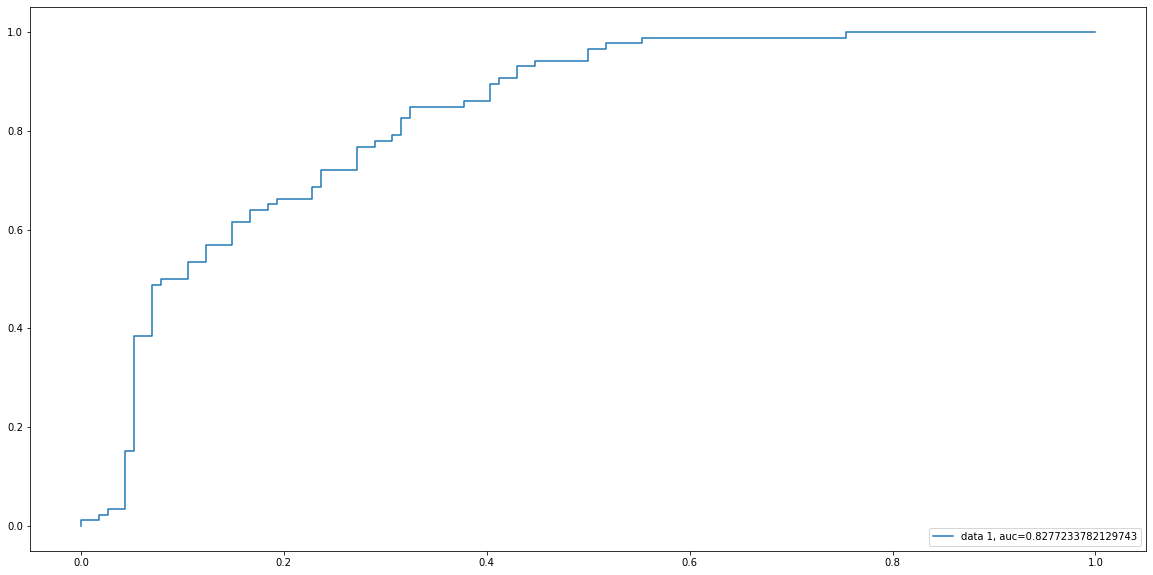

In [550]:
import matplotlib.pyplot as plt
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [551]:
# true positives, etc.
y_score = mymodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresh=metrics.roc_curve(y_test, y_score)
roc_df=pd.DataFrame(zip(fpr, tpr, thresh), columns=['FPR','TPR','Threshold'])
roc_df.head()

,FPR,TPR,Threshold
0,0.000000,0.000000,1.957474
1,0.000000,0.011628,0.957474
2,0.017544,0.011628,0.936497
3,0.017544,0.023256,0.920802
4,0.026316,0.023256,0.911987


In [552]:
# pickle dataframe

filename = open('roc_df.pkl', 'wb')
pickle.dump(roc_df, filename)
filename.close()

roc_df.to_csv('roc_df.csv', index=False)

0.6028683958596941 30


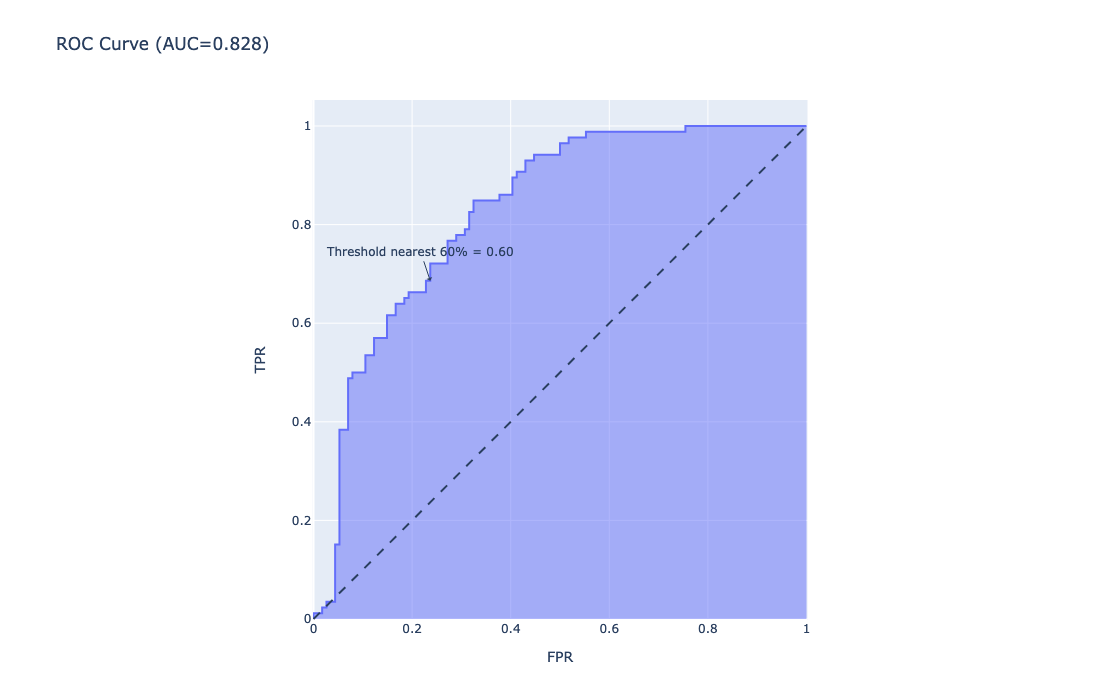

In [553]:
import plotly.express as px

def make_rocauc(i):
    nearest=roc_df.iloc[(roc_df['Threshold']-i).abs().argsort()[:1]]['Threshold'].values[0]
    q=roc_df[roc_df['Threshold']==nearest].index[0]
    print(nearest, q)
    fig = px.area(roc_df, x="FPR", y="TPR",
                  title=f'ROC Curve (AUC={metrics.auc(fpr, tpr):.3f})',
                  hover_data={'Threshold':':.2f',
                              'FPR':':.2f',
                              'TPR':':.2f',
                             },width=800, height=700)

    fig.add_annotation(x=roc_df.iloc[q][0], y=roc_df.iloc[q][1],
            text=f"Threshold nearest {i*100:.0f}% = {roc_df.iloc[q][2]:.2f}",
                showarrow=True,
                arrowhead=1)

    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    return fig
make_rocauc(.60)

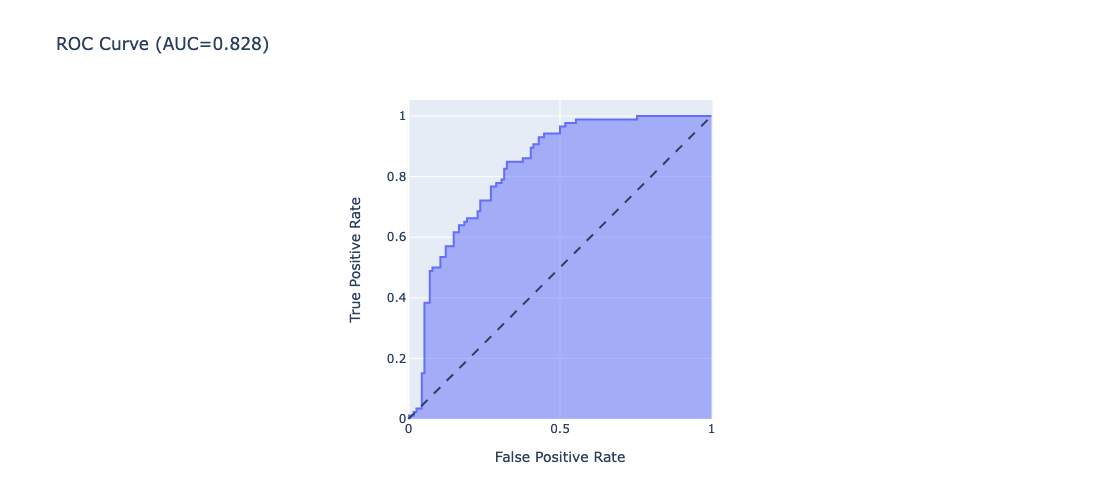

In [554]:
# display with plotly
import plotly.express as px
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={metrics.auc(fpr, tpr):.3f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.write_json('../assets/rocauc.json')
fig.show()

In [230]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression  # Class
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb

In [231]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'roc_auc'
models = []
models.append(('LRM  ', LogisticRegression(random_state = 21, solver='newton-cg', max_iter=1000)))
#models.append(('LDA  ', LinearDiscriminantAnalysis()))
#models.append(('KNN  ', KNeighborsClassifier(n_neighbors = 21  , metric = 'minkowski', p = 2)))
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 21)))
models.append(('GNB  ', GaussianNB()))
#models.append(('SVM  ', SVC(kernel = 'linear', random_state = 21)))
#models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 21)))
models.append(('ABM  ', AdaBoostClassifier(random_state=21 , n_estimators=  53, learning_rate = .7, algorithm = 'SAMME.R')))
models.append(('GBM  ', GradientBoostingClassifier()))
models.append(('RFM  ', RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 21)))
models.append(('ExT  ', ExtraTreesClassifier()))
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  :%s  : %f (%f)" % (name, scoring,cv_results.mean(), cv_results.std())
    print(msg)

/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning:

The line search algorithm did not converge

/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge



LRM    :roc_auc  : 0.744529 (0.026959)
CART   :roc_auc  : 0.647149 (0.039298)
GNB    :roc_auc  : 0.738860 (0.018380)
ABM    :roc_auc  : 0.691190 (0.039524)
GBM    :roc_auc  : 0.736694 (0.040797)
RFM    :roc_auc  : 0.771212 (0.056120)
ExT    :roc_auc  : 0.750148 (0.046040)


In [229]:
!pip install GaussianNB

ERROR: Could not find a version that satisfies the requirement GaussianNB (from versions: none)
ERROR: No matching distribution found for GaussianNB


## Make predictions on new data

In [19]:
# check out one row of the test data
X_test.iloc[0]

Credit_History         1.0
LoanAmount            17.0
Loan_Amount_Term     120.0
ApplicantIncome     1299.0
Name: 14, dtype: float64

In [20]:
# show a prediction & probability for that value
print(mymodel.predict([X_test.iloc[0].values])[0])
print(mymodel.predict_proba([X_test.iloc[0].values]).max())

1
0.8397937895393283


In [21]:
# pickle your model
import pickle
filename = open('loan_approval_logistic_model.pkl', 'wb')
pickle.dump(mymodel, filename)
filename.close()

In [22]:
# read in our pickle file
filename = open('loan_approval_logistic_model.pkl', 'rb')
unpickled_model = pickle.load(filename)
filename.close()

In [23]:
# make predictions on new data
fake1=[[1, 1000, 180, 100]]
fake2=[[1, 300, 360, 4500]]
fake3=[[0, 100, 360, 1000]]

In [24]:
# make predictions
for data in [fake1, fake2, fake3]:
    y = unpickled_model.predict(data)
    func = lambda y: 'approved' if y[0]==1 else 'denied'
    formatted_y = func(y)
    prob=unpickled_model.predict_proba(data).max()*100
    formatted_prob = "{:,.2f}%".format(prob)
    print(y[0]==1)
    print(formatted_y)
    print(formatted_prob)

False
denied
74.67%
True
approved
70.24%
False
denied
84.74%


In [25]:
# change the threshold
Threshold=50
for data in [fake1, fake2, fake3]:
        rawprob=100*unpickled_model.predict_proba(data)[0][0]
        func = lambda y: 'Denied' if int(rawprob)>Threshold else 'Approved'
        formatted_y = func(y)
        print(rawprob)
        print(formatted_y)

74.67430567693
Denied
29.760936281141092
Approved
84.74455826644059
Denied


In [26]:
# probability of 'denied'
print(unpickled_model.predict_proba(data)[0][0])
# probability of 'denied'
unpickled_model.predict_proba(data)[0][1]

0.847445582664406


0.15255441733559405